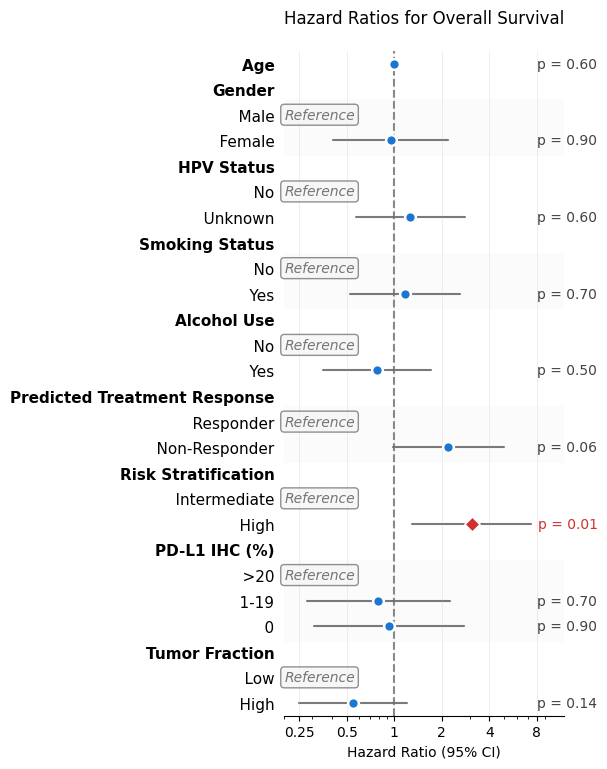

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

df = pd.read_csv("hazard_os_new.csv")

df["is_ref"] = False
df["is_category_header"] = False

current_category = None
for idx, row in df.iterrows():
    if pd.isna(row["HR"]) and pd.isna(row["HR_lower"]) and pd.isna(row["HR_upper"]) and pd.isna(row["p_value"]):
        contrast_clean = str(row["contrast"]).strip().lower()
        if contrast_clean in ["age", "gender", "hpv", "smoking", "alcohol", "response", "stratification", "ihc", "tf"]:
            df.loc[idx, "is_category_header"] = True
            current_category = row["contrast"]
        else:
            df.loc[idx, "is_ref"] = True
df.loc[0, "contrast"] = "Age"
df_plot = df[::-1].reset_index(drop=True)
df_plot["y_pos"] = range(len(df_plot))
df_plot["significant"] = df_plot["p_value"] < 0.05

def format_label(row):
    if row["is_category_header"]:
        category_names = {
            'gender': 'Gender',
            'hpv': 'HPV Status',
            'smoking': 'Smoking Status',
            'alcohol': 'Alcohol Use',
            'response': 'Predicted Treatment Response',
            'stratification': 'Risk Stratification',
            'ihc': 'PD-L1 IHC (%)',
            'tf': 'Tumor Fraction',
            'age': 'Age'
        }
        return category_names.get(row["contrast"].lower(), row["contrast"].title())
    else:
        return f"    {row['contrast']}"

df_plot["formatted_label"] = df_plot.apply(format_label, axis=1)

fig, ax = plt.subplots(figsize=(6, len(df_plot) * 0.30))

colors = {
    'significant': '#D32F2F',
    'non_significant': '#1976D2',
    'reference': '#757575',
    'category_header': '#424242',
    'ci_line': '#424242'
}

category_positions = df_plot[df_plot["is_category_header"]]["y_pos"].tolist()
for i in range(len(category_positions)):
    if i % 2 == 0:
        start_y = category_positions[i]
        end_y = category_positions[i+1] if i+1 < len(category_positions) else -0.5
        rect = Rectangle((0.05, end_y - 0.4), 15, start_y - end_y + 0.8, 
                         facecolor='#F8F9FA', alpha=0.5, zorder=0)
        ax.add_patch(rect)

for _, row in df_plot.iterrows():
    y = row["y_pos"]
    if row["is_category_header"] or row["is_ref"]:
        continue
    if not pd.isna(row["HR"]):
        ax.plot([row["HR_lower"], row["HR_upper"]], [y, y],
                color=colors['ci_line'], lw=1.5, alpha=0.7,
                solid_capstyle='round', zorder=1)
        point_color = colors['significant'] if row["significant"] else colors['non_significant']
        ax.scatter(row["HR"], y, color=point_color, s=60, zorder=2,
                   edgecolors='white', linewidth=1.8, marker='o')
        if row["significant"]:
            ax.scatter(row["HR"], y, color=point_color, s=60, zorder=3,
                       edgecolors='white', linewidth=1.2, marker='D')

ax.axvline(1, color='#666666', linestyle='--', lw=1.5, alpha=0.8, zorder=1)

for _, row in df_plot.iterrows():
    y = row["y_pos"]
    if row["is_category_header"]:
        continue
    elif row["is_ref"]:
        ax.text(0.2, y, "Reference", va="center", ha="left",
                fontsize=10, style="italic", color=colors['reference'],
                bbox=dict(boxstyle="round,pad=0.25", facecolor='#F5F5F5',
                          edgecolor=colors['reference'], alpha=0.8))
    elif not pd.isna(row["HR"]):
        p = row["p_value"]
        if p < 0.001:
            p_text = "p < 0.001"
        elif p < 0.01:
            p_text = f"p = {p:.3f}"
        else:
            p_text = f"p = {p:.2f}"
        color = colors['significant'] if row["significant"] else '#424242'
        x_pos = max(row["HR_upper"] * 1.1, 8)
        ax.text(x_pos, y, p_text, va="center", ha="left",
                fontsize=10, color=color, weight='normal')

ax.set_xscale("log")
ax.set_xlim(0.2, 12)
ax.set_xticks([0.25, 0.5, 1, 2, 4, 8])
ax.set_xticklabels(["0.25", "0.5", "1", "2", "4", "8"])
ax.set_xlabel("Hazard Ratio (95% CI)")

ax.set_yticks(df_plot["y_pos"])
ax.set_yticklabels(df_plot["formatted_label"], fontsize=11, color='black')
for label, is_header in zip(ax.get_yticklabels(), df_plot["is_category_header"]):
    if is_header or label.get_text().strip() == "Age":
        label.set_fontweight('bold')
ax.set_ylim(-0.5, len(df_plot) - 0.5)

ax.set_title("Hazard Ratios for Overall Survival", pad=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, top=False, right=False)
ax.grid(True, axis='x', alpha=0.3, linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.savefig("osnew.pdf", bbox_inches="tight", dpi=300,
            facecolor='white', edgecolor='none')

plt.show()

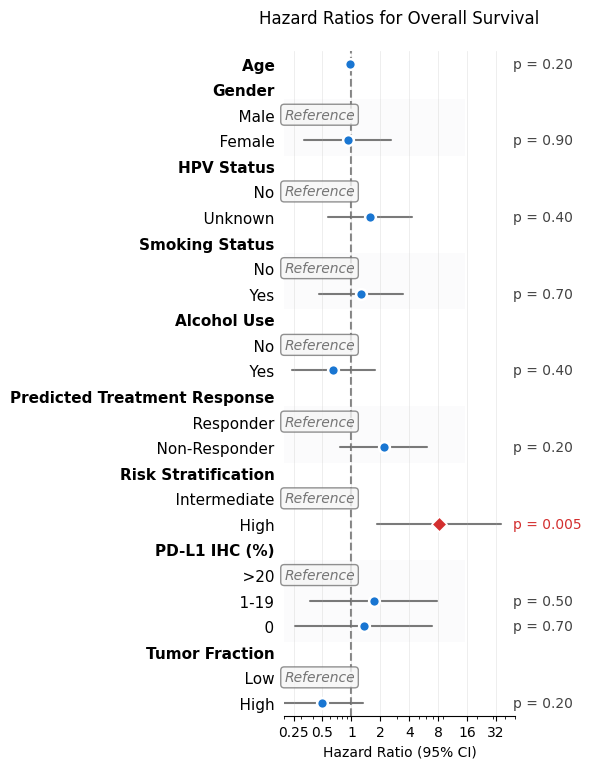

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

df = pd.read_csv("hazard_os_old.csv")

df["is_ref"] = False
df["is_category_header"] = False

current_category = None
for idx, row in df.iterrows():
    if pd.isna(row["HR"]) and pd.isna(row["HR_lower"]) and pd.isna(row["HR_upper"]) and pd.isna(row["p_value"]):
        contrast_clean = str(row["contrast"]).strip().lower()
        if contrast_clean in ["age", "gender", "hpv", "smoking", "alcohol", "response", "stratification", "ihc", "tf"]:
            df.loc[idx, "is_category_header"] = True
            current_category = row["contrast"]
        else:
            df.loc[idx, "is_ref"] = True
df.loc[0, "contrast"] = "Age"
df_plot = df[::-1].reset_index(drop=True)
df_plot["y_pos"] = range(len(df_plot))
df_plot["significant"] = df_plot["p_value"] < 0.05

def format_label(row):
    if row["is_category_header"]:
        category_names = {
            'gender': 'Gender',
            'hpv': 'HPV Status',
            'smoking': 'Smoking Status',
            'alcohol': 'Alcohol Use',
            'response': 'Predicted Treatment Response',
            'stratification': 'Risk Stratification',
            'ihc': 'PD-L1 IHC (%)',
            'tf': 'Tumor Fraction',
            'age': 'Age'
        }
        return category_names.get(row["contrast"].lower(), row["contrast"].title())
    else:
        return f"    {row['contrast']}"

df_plot["formatted_label"] = df_plot.apply(format_label, axis=1)

fig, ax = plt.subplots(figsize=(6, len(df_plot) * 0.30))

colors = {
    'significant': '#D32F2F',
    'non_significant': '#1976D2',
    'reference': '#757575',
    'category_header': '#424242',
    'ci_line': '#424242'
}

category_positions = df_plot[df_plot["is_category_header"]]["y_pos"].tolist()
for i in range(len(category_positions)):
    if i % 2 == 0:
        start_y = category_positions[i]
        end_y = category_positions[i+1] if i+1 < len(category_positions) else -0.5
        rect = Rectangle((0.05, end_y - 0.4), 15, start_y - end_y + 0.8, 
                         facecolor='#F8F9FA', alpha=0.5, zorder=0)
        ax.add_patch(rect)

for _, row in df_plot.iterrows():
    y = row["y_pos"]
    if row["is_category_header"] or row["is_ref"]:
        continue
    if not pd.isna(row["HR"]):
        ax.plot([row["HR_lower"], row["HR_upper"]], [y, y],
                color=colors['ci_line'], lw=1.5, alpha=0.7,
                solid_capstyle='round', zorder=1)
        point_color = colors['significant'] if row["significant"] else colors['non_significant']
        ax.scatter(row["HR"], y, color=point_color, s=60, zorder=2,
                   edgecolors='white', linewidth=1.8, marker='o')
        if row["significant"]:
            ax.scatter(row["HR"], y, color=point_color, s=60, zorder=3,
                       edgecolors='white', linewidth=1.2, marker='D')

ax.axvline(1, color='#666666', linestyle='--', lw=1.5, alpha=0.8, zorder=1)

for _, row in df_plot.iterrows():
    y = row["y_pos"]
    if row["is_category_header"]:
        continue
    elif row["is_ref"]:
        ax.text(0.2, y, "Reference", va="center", ha="left",
                fontsize=10, style="italic", color=colors['reference'],
                bbox=dict(boxstyle="round,pad=0.25", facecolor='#F5F5F5',
                          edgecolor=colors['reference'], alpha=0.8))
    elif not pd.isna(row["HR"]):
        p = row["p_value"]
        if p < 0.001:
            p_text = "p < 0.001"
        elif p < 0.01:
            p_text = f"p = {p:.3f}"
        else:
            p_text = f"p = {p:.2f}"
        color = colors['significant'] if row["significant"] else '#424242'
        x_pos = max(row["HR_upper"] * 1.1, 48)
        ax.text(x_pos, y, p_text, va="center", ha="left",
                fontsize=10, color=color, weight='normal')

ax.set_xscale("log")
ax.set_xlim(0.2, 50)
ax.set_xticks([0.25, 0.5, 1, 2, 4, 8, 16, 32])
ax.set_xticklabels(["0.25", "0.5", "1", "2", "4", "8", "16", "32"])
ax.set_xlabel("Hazard Ratio (95% CI)")

ax.set_yticks(df_plot["y_pos"])
ax.set_yticklabels(df_plot["formatted_label"], fontsize=11, color='black')
for label, is_header in zip(ax.get_yticklabels(), df_plot["is_category_header"]):
    if is_header or label.get_text().strip() == "Age":
        label.set_fontweight('bold')
ax.set_ylim(-0.5, len(df_plot) - 0.5)

ax.set_title("Hazard Ratios for Overall Survival", pad=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, top=False, right=False)
ax.grid(True, axis='x', alpha=0.3, linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.savefig("osold.pdf", bbox_inches="tight", dpi=300,
            facecolor='white', edgecolor='none')

plt.show()


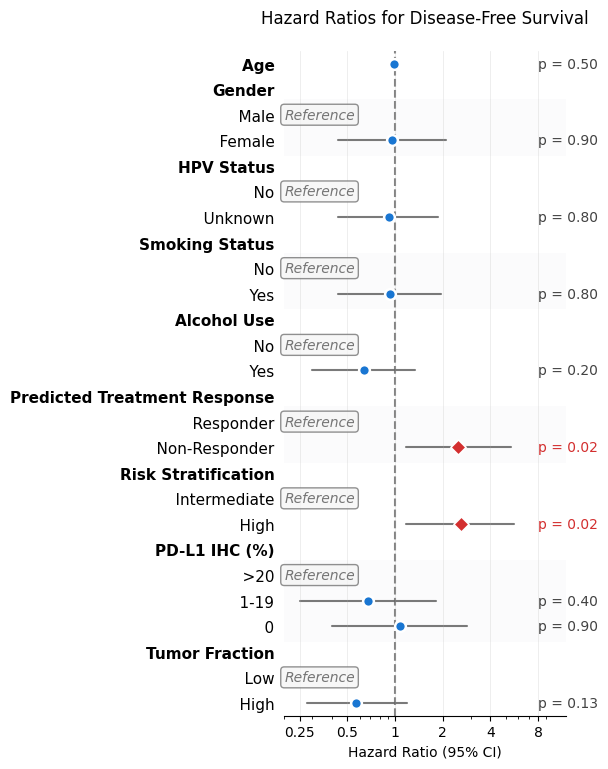

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

df = pd.read_csv("hazard_dfs_new.csv")

df["is_ref"] = False
df["is_category_header"] = False

current_category = None
for idx, row in df.iterrows():
    if pd.isna(row["HR"]) and pd.isna(row["HR_lower"]) and pd.isna(row["HR_upper"]) and pd.isna(row["p_value"]):
        contrast_clean = str(row["contrast"]).strip().lower()
        if contrast_clean in ["age", "gender", "hpv", "smoking", "alcohol", "response", "stratification", "ihc", "tf"]:
            df.loc[idx, "is_category_header"] = True
            current_category = row["contrast"]
        else:
            df.loc[idx, "is_ref"] = True
df.loc[0, "contrast"] = "Age"
df_plot = df[::-1].reset_index(drop=True)
df_plot["y_pos"] = range(len(df_plot))
df_plot["significant"] = df_plot["p_value"] < 0.05

def format_label(row):
    if row["is_category_header"]:
        category_names = {
            'gender': 'Gender',
            'hpv': 'HPV Status',
            'smoking': 'Smoking Status',
            'alcohol': 'Alcohol Use',
            'response': 'Predicted Treatment Response',
            'stratification': 'Risk Stratification',
            'ihc': 'PD-L1 IHC (%)',
            'tf': 'Tumor Fraction',
            'age': 'Age'
        }
        return category_names.get(row["contrast"].lower(), row["contrast"].title())
    else:
        return f"    {row['contrast']}"

df_plot["formatted_label"] = df_plot.apply(format_label, axis=1)

fig, ax = plt.subplots(figsize=(6, len(df_plot) * 0.30))

colors = {
    'significant': '#D32F2F',
    'non_significant': '#1976D2',
    'reference': '#757575',
    'category_header': '#424242',
    'ci_line': '#424242'
}

category_positions = df_plot[df_plot["is_category_header"]]["y_pos"].tolist()
for i in range(len(category_positions)):
    if i % 2 == 0:
        start_y = category_positions[i]
        end_y = category_positions[i+1] if i+1 < len(category_positions) else -0.5
        rect = Rectangle((0.05, end_y - 0.4), 15, start_y - end_y + 0.8, 
                         facecolor='#F8F9FA', alpha=0.5, zorder=0)
        ax.add_patch(rect)

for _, row in df_plot.iterrows():
    y = row["y_pos"]
    if row["is_category_header"] or row["is_ref"]:
        continue
    if not pd.isna(row["HR"]):
        ax.plot([row["HR_lower"], row["HR_upper"]], [y, y],
                color=colors['ci_line'], lw=1.5, alpha=0.7,
                solid_capstyle='round', zorder=1)
        point_color = colors['significant'] if row["significant"] else colors['non_significant']
        ax.scatter(row["HR"], y, color=point_color, s=60, zorder=2,
                   edgecolors='white', linewidth=1.8, marker='o')
        if row["significant"]:
            ax.scatter(row["HR"], y, color=point_color, s=60, zorder=3,
                       edgecolors='white', linewidth=1.2, marker='D')

ax.axvline(1, color='#666666', linestyle='--', lw=1.5, alpha=0.8, zorder=1)

for _, row in df_plot.iterrows():
    y = row["y_pos"]
    if row["is_category_header"]:
        continue
    elif row["is_ref"]:
        ax.text(0.2, y, "Reference", va="center", ha="left",
                fontsize=10, style="italic", color=colors['reference'],
                bbox=dict(boxstyle="round,pad=0.25", facecolor='#F5F5F5',
                          edgecolor=colors['reference'], alpha=0.8))
    elif not pd.isna(row["HR"]):
        p = row["p_value"]
        if p < 0.001:
            p_text = "p < 0.001"
        elif p < 0.01:
            p_text = f"p = {p:.3f}"
        else:
            p_text = f"p = {p:.2f}"
        color = colors['significant'] if row["significant"] else '#424242'
        x_pos = max(row["HR_upper"] * 1.1, 8)
        ax.text(x_pos, y, p_text, va="center", ha="left",
                fontsize=10, color=color, weight='normal')

ax.set_xscale("log")
ax.set_xlim(0.2, 12)
ax.set_xticks([0.25, 0.5, 1, 2, 4, 8])
ax.set_xticklabels(["0.25", "0.5", "1", "2", "4", "8"])
ax.set_xlabel("Hazard Ratio (95% CI)")

ax.set_yticks(df_plot["y_pos"])
ax.set_yticklabels(df_plot["formatted_label"], fontsize=11, color='black')
for label, is_header in zip(ax.get_yticklabels(), df_plot["is_category_header"]):
    if is_header or label.get_text().strip() == "Age":
        label.set_fontweight('bold')
ax.set_ylim(-0.5, len(df_plot) - 0.5)

ax.set_title("Hazard Ratios for Disease-Free Survival", pad=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, top=False, right=False)
ax.grid(True, axis='x', alpha=0.3, linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.savefig("dfsnew.pdf", bbox_inches="tight", dpi=300,
            facecolor='white', edgecolor='none')

plt.show()


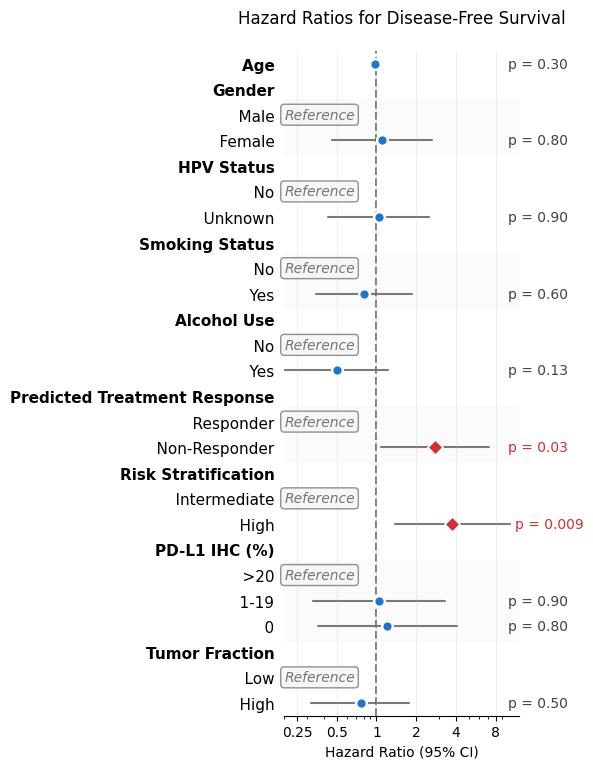

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

df = pd.read_csv("hazard_dfs_old.csv")

df["is_ref"] = False
df["is_category_header"] = False

current_category = None
for idx, row in df.iterrows():
    if pd.isna(row["HR"]) and pd.isna(row["HR_lower"]) and pd.isna(row["HR_upper"]) and pd.isna(row["p_value"]):
        contrast_clean = str(row["contrast"]).strip().lower()
        if contrast_clean in ["age", "gender", "hpv", "smoking", "alcohol", "response", "stratification", "ihc", "tf"]:
            df.loc[idx, "is_category_header"] = True
            current_category = row["contrast"]
        else:
            df.loc[idx, "is_ref"] = True
df.loc[0, "contrast"] = "Age"
df_plot = df[::-1].reset_index(drop=True)
df_plot["y_pos"] = range(len(df_plot))
df_plot["significant"] = df_plot["p_value"] < 0.05

def format_label(row):
    if row["is_category_header"]:
        category_names = {
            'gender': 'Gender',
            'hpv': 'HPV Status',
            'smoking': 'Smoking Status',
            'alcohol': 'Alcohol Use',
            'response': 'Predicted Treatment Response',
            'stratification': 'Risk Stratification',
            'ihc': 'PD-L1 IHC (%)',
            'tf': 'Tumor Fraction',
            'age': 'Age'
        }
        return category_names.get(row["contrast"].lower(), row["contrast"].title())
    else:
        return f"    {row['contrast']}"

df_plot["formatted_label"] = df_plot.apply(format_label, axis=1)

fig, ax = plt.subplots(figsize=(6, len(df_plot) * 0.30))

colors = {
    'significant': '#D32F2F',
    'non_significant': '#1976D2',
    'reference': '#757575',
    'category_header': '#424242',
    'ci_line': '#424242'
}

category_positions = df_plot[df_plot["is_category_header"]]["y_pos"].tolist()
for i in range(len(category_positions)):
    if i % 2 == 0:
        start_y = category_positions[i]
        end_y = category_positions[i+1] if i+1 < len(category_positions) else -0.5
        rect = Rectangle((0.05, end_y - 0.4), 15, start_y - end_y + 0.8, 
                         facecolor='#F8F9FA', alpha=0.5, zorder=0)
        ax.add_patch(rect)

for _, row in df_plot.iterrows():
    y = row["y_pos"]
    if row["is_category_header"] or row["is_ref"]:
        continue
    if not pd.isna(row["HR"]):
        ax.plot([row["HR_lower"], row["HR_upper"]], [y, y],
                color=colors['ci_line'], lw=1.5, alpha=0.7,
                solid_capstyle='round', zorder=1)
        point_color = colors['significant'] if row["significant"] else colors['non_significant']
        ax.scatter(row["HR"], y, color=point_color, s=60, zorder=2,
                   edgecolors='white', linewidth=1.8, marker='o')
        if row["significant"]:
            ax.scatter(row["HR"], y, color=point_color, s=60, zorder=3,
                       edgecolors='white', linewidth=1.2, marker='D')

ax.axvline(1, color='#666666', linestyle='--', lw=1.5, alpha=0.8, zorder=1)

for _, row in df_plot.iterrows():
    y = row["y_pos"]
    if row["is_category_header"]:
        continue
    elif row["is_ref"]:
        ax.text(0.2, y, "Reference", va="center", ha="left",
                fontsize=10, style="italic", color=colors['reference'],
                bbox=dict(boxstyle="round,pad=0.25", facecolor='#F5F5F5',
                          edgecolor=colors['reference'], alpha=0.8))
    elif not pd.isna(row["HR"]):
        p = row["p_value"]
        if p < 0.001:
            p_text = "p < 0.001"
        elif p < 0.01:
            p_text = f"p = {p:.3f}"
        else:
            p_text = f"p = {p:.2f}"
        color = colors['significant'] if row["significant"] else '#424242'
        x_pos = max(row["HR_upper"] * 1.1, 10)
        ax.text(x_pos, y, p_text, va="center", ha="left",
                fontsize=10, color=color, weight='normal')

ax.set_xscale("log")
ax.set_xlim(0.2, 12)
ax.set_xticks([0.25, 0.5, 1, 2, 4, 8])
ax.set_xticklabels(["0.25", "0.5", "1", "2", "4", "8"])
ax.set_xlabel("Hazard Ratio (95% CI)")

ax.set_yticks(df_plot["y_pos"])
ax.set_yticklabels(df_plot["formatted_label"], fontsize=11, color='black')
for label, is_header in zip(ax.get_yticklabels(), df_plot["is_category_header"]):
    if is_header or label.get_text().strip() == "Age":
        label.set_fontweight('bold')
ax.set_ylim(-0.5, len(df_plot) - 0.5)

ax.set_title("Hazard Ratios for Disease-Free Survival", pad=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, top=False, right=False)
ax.grid(True, axis='x', alpha=0.3, linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.savefig("dfsold.pdf", bbox_inches="tight", dpi=300,
            facecolor='white', edgecolor='none')

plt.show()
